indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

Frequency 346000000000.0
Beam area 7.342260538013989e-13
Pixel area 2.350439083243212e-15
Pixels per beam area 312.37825265749495
Jy per Beam to Jy per pixel 0.0032012471786774586
51.4013625 30.754159166666668
Average Beam:  0.169104270637026 16.910427063701245
[[  1.09360892e+03   1.05030007e+03  -1.78726826e+02  -1.00000000e+00]]
[   8.45521353   16.91042706   25.3656406    33.82085413   42.27606766
   50.73128119   59.18649472   67.64170825   76.09692179   84.55213532
   93.00734885  101.46256238  109.91777591  118.37298945  126.82820298
  135.28341651  143.73863004  152.19384357  160.64905711  169.10427064
  177.55948417  186.0146977   194.46991123  202.92512476  211.3803383
  219.83555183  228.29076536  236.74597889  245.20119242  253.65640596
  262.11161949  270.56683302  279.02204655  287.47726008  295.93247361
  304.38768715  312.84290068  321.29811421  329.75332774]


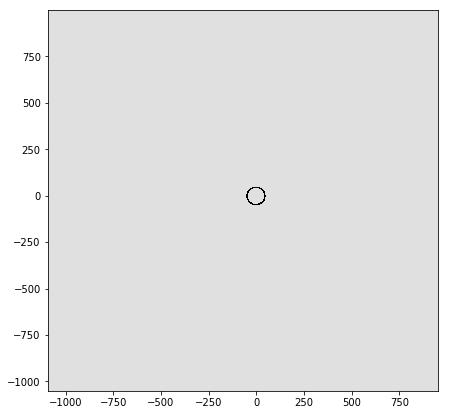

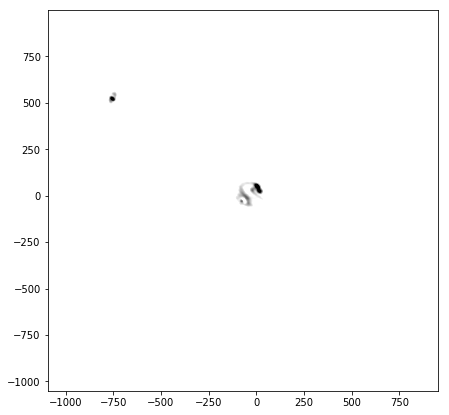

In [1]:
import numpy as np
#import pyfits as fits
import math
from astropy import wcs
from astropy.io import fits
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker


%matplotlib inline

# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&
# CGS PHYSICAL CONSTANTS
# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&

c = 2.99792458e10       # speed of light CGS
h = 6.6260755e-27       # Planck's constant CGS
g = 6.67259e-8          # Grav const CGS
kb = 1.380658e-16       # Boltzmann's const CGS
a = 7.56591e-15         # Radiation constant CGS
sb = 5.67051e-5         # sigma (stefan-boltzmann const) CGS
qe =  4.803206e-10      # Charge of electron CGS
ev =  1.60217733e-12    # Electron volt CGS
na =  6.0221367e23      # Avagadro's Number
me =  9.1093897e-28     # electron mass CGS
mp =  1.6726231e-24     # proton mass CGS
mn = 1.674929e-24       # neutron mass CGS
mh = 1.673534e-24       # hydrogen mass CGS
amu =  1.6605402e-24    # atomic mass unit CGS
pi = 3.14159
# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&
# ASTRONOMICAL CONSTANTS
# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&

# GENERAL
au = 1.496e13           # astronomical unit CGS
pc = 3.0857e18          # parsec CGS
yr = 3.155815e7         # sidereal year CGS
ms = 1.98900e+33        # solar mass CGS
rs = 6.9599e10          # sun's radius CGS
ls = 3.839e33           # sun's luminosity CGS
mm = 7.35000e+25        # moon mass CGS
mer = 5.97400e+27       # earth mass CGS
rer = 6.378e8           # earth's radius CGS
medd = 3.60271e+34      # Eddington mass CGS

# RADIO SPECIFIC
jy = 1.e-23                  # Jansky CGS
restfreq_hi = 1420405751.786 # 21cm transition (Hz)
restfreq_co = 115271201800.  # CO J=1-0 (Hz)
cm2perkkms_hi = 1.823e18     # HI column per intensity (thin)

# FUNCTION
def icrs_hr(icrs):
    tmp0 = float(icrs[0])
    tmp01 = tmp0
    if tmp01 < 0:
        tmp0 = abs(tmp0)
    tmp1 = abs(float(icrs[1])/60.)
    tmp2 = abs(float(icrs[2])/3600.)
    icrs = tmp0 + tmp1 + tmp2
    if tmp01 < 0:
        icrs = icrs * -1.
    return icrs


pa=(90.0-29.5)*3.14159/180.0
#pa=(45.0)*3.14159/180.0
inc=45.0*3.14159/180.0

imagename='continuum-concat-deproj_4_output.residual.fits'
_end_='concat-deproj.pdf'
rms=4.34E-4
hdu = fits.open(imagename)
image = np.transpose(np.copy(hdu[0].data))
image=np.copy(hdu[0].data)

# PUT IN DEGREES or ICRS
ra_orig='03 25 36.327'
dec_orig='30 45 14.973'
while True:
    try:
        ra_fin = float(ra_orig)
        dec_fin = float(dec_orig)
    except ValueError:
        try:
            ra_fin = ra_orig.split(':')
            dec_fin = dec_orig.split(':')
            if len(ra_fin) == 1:
                ra_fin =  ra_orig.split(' ')            
            if len(dec_fin) == 1:
                dec_fin =  dec_orig.split(' ')
            if ((len(dec_fin) == 3) and (len(ra_fin) == 3)):
                ra_fin=icrs_hr(ra_fin)*15.
                dec_fin=icrs_hr(dec_fin)
                break
            else:
                continue
        except ValueError:
            input('Error: Press [RET] to continue.')
            continue
        continue
if (type(ra_fin) is float) and (type(dec_fin) is float):
    ra=ra_fin
    dec=dec_fin


header= hdu[0].header
w = wcs.WCS(hdu[0].header)
    #w.wcs.print_contents()
    #pixcrd = numpy.array([[0, 0], [24, 38], [45, 98]], numpy.float_)
    #print pixcrd
    #pixcrd=np.array([[1000,1000],[1000,1000]])
    #world = w.wcs_pix2world(pixcrd, 0)
    #print(world)
pixscaledeg=header['CDELT2']
pixscale=header['CDELT2']*3600
bmaj=header['BMAJ']
bmin=header['BMIN']
npix=header['NAXIS1']
freq=header['RESTFRQ']
omega=(pi*bmaj*bmin)*(pi/180.0)**2
beamarea=(omega)/(4.0*math.log(2.0))
pixelarea=(pixscaledeg*pi/180.0)**2
print('Frequency', freq)
print('Beam area', beamarea)
print('Pixel area', pixelarea)
jybm2jy=1.0/beamarea*pixelarea
pixelsperbeam=beamarea/pixelarea

print('Pixels per beam area', pixelsperbeam)
print('Jy per Beam to Jy per pixel',jybm2jy)
image=image[::-1][::-1][:][:]*jybm2jy
print(ra,dec)

avgbeam=(bmaj+bmin)/2.0*3600.0
print('Average Beam: ', avgbeam,avgbeam/pixscale)
aperturebase=avgbeam/pixscale/2.0

world=np.array([[ra,dec,0,0]  ])
pix=w.wcs_world2pix(world, 0)
print(pix)
xcen=pix[0][0]
ycen=pix[0][1]
apertures=np.arange(1.0,40.0, dtype=np.float)*aperturebase # edit this to increase mask size
print(apertures)

#xgrid_off=np.arange(npix,dtype=np.float)-npix/2.0
#xgrid_off=np.arange(npix,dtype=np.float)-1016
#ygrid_off=np.arange(npix,dtype=np.float)-npix/2.0

xgrid_off=np.arange(npix,dtype=np.float)-xcen
ygrid_off=np.arange(npix,dtype=np.float)-ycen

ygrid_proj=ygrid_off #/np.cos(inc)
#print ygrid_proj

xgrid,ygrid=np.meshgrid(xgrid_off,ygrid_proj)

r = np.sqrt(xgrid**2 + (ygrid)**2)
mask1 = r < apertures[5]
mask2 = r > apertures[4] 
mask=mask1*mask2
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.pcolormesh(xgrid_off[:],ygrid_proj[:],mask[:,:], cmap='gray_r', vmin=-0.014, vmax=0.1)
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.pcolormesh(xgrid_off[:],ygrid_off[:],image[0,0,:,:]/jybm2jy, cmap='gray_r', vmin=-0.0014, vmax=0.01)

1.0559233055555555
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
(1, 1, 2048, 2048)
(2048, 2048)
(2048, 2048)


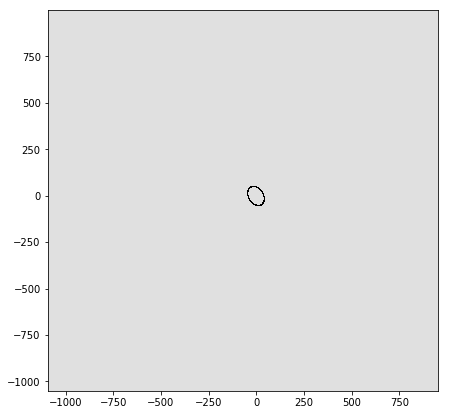

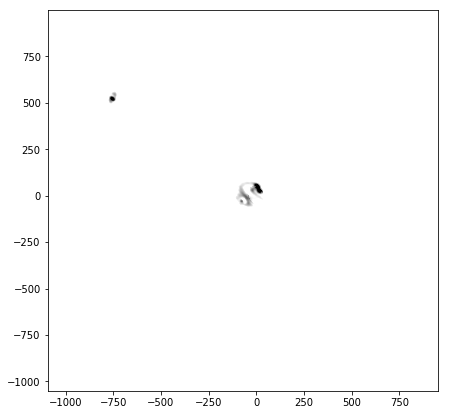

In [2]:

print(pa)

xgrid_rot= (xgrid * np.cos(pa) - ygrid * np.sin(pa)) # disk major axis
ygrid_rot= (xgrid * np.sin(pa) + ygrid * np.cos(pa)) # disk minor axis

#print xgrid_rot.shape
#print ygrid_rot.shape
#print xgrid_rot[1000:1050,1000:1050]
#print ygrid_rot[1000:1050,1000:1050]


r = np.sqrt(xgrid_rot**2 + (ygrid_rot/np.cos(inc))**2)
mask1 = r > apertures[5]
mask2 = r < apertures[6]
mask=mask1*mask2
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.pcolormesh(xgrid_off[:],ygrid_off[:],mask[:,:], cmap='gray_r', vmin=-0.014, vmax=0.1)

mask1 = r > apertures[5]
mask2 = r < apertures[6]
mask=mask1*mask2
print(mask[1024][1000:1050])
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

print(image.shape)
print(mask.shape)
maskedimage=np.ma.MaskedArray(image[0,0,:,:], mask=mask)
print(maskedimage.shape)
plt.pcolormesh(xgrid_off[:],ygrid_off[:],maskedimage[:,:]/jybm2jy, cmap='gray_r', vmin=-0.0014, vmax=0.01)

#ymin=int(round(ycen-apertures)+1)
#ymax=int(round(ycen+apertures)+1)
#xmin=int(round(xcen-apertures)+1)
#xmax=int(round(xcen+apertures)+1)
#print xmin,xmax,ymin,ymax

8.45521353185 -0.000228398843319 0.000222294604087 -0.000228398843319 0.000222294604087 160
16.9104270637 -0.000768227269873 0.000658547764609 -0.000768227269873 0.000658547764609 474
25.3656405956 -0.00151543121319 0.00110869433789 -0.00151543121319 0.00110869433789 798
33.8208541274 -0.00038290626253 0.00154216881586 -0.00038290626253 0.00154216881586 1110
42.2760676593 0.00251442426816 0.0019825900002 0.00251442426816 0.0019825900002 1427
50.7312811911 0.00276641966775 0.00243690459731 0.00276641966775 0.00243690459731 1754
59.186494723 0.00250983890146 0.00286482171018 0.00250983890146 0.00286482171018 2062
67.6417082548 0.000837094092276 0.0033010748707 0.000837094092276 0.0033010748707 2376
76.0969217867 -0.00823325570673 0.0037498321027 -0.00823325570673 0.0037498321027 2699
84.5521353185 -0.0198969300836 0.0041985893347 -0.0198969300836 0.0041985893347 3022
93.0073488504 -0.0318369455636 0.00462094908247 -0.0318369455636 0.00462094908247 3326
101.462562382 -0.0442406199872 0.00

/home/reynolds/programs/Python-3.6.1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


177.559484169 -0.176568984985 0.00905155841018 -0.176568984985 0.00905155841018 6515
186.014697701 -0.190710157156 0.0094878115707 -0.190710157156 0.0094878115707 6829
194.469911233 -0.203873559833 0.0099198967074 -0.203873559833 0.0099198967074 7140
202.925124764 -0.217817291617 0.0103797686696 -0.217817291617 0.0103797686696 7471
211.380338296 -0.230930969119 0.0108049070999 -0.230930969119 0.0108049070999 7777
219.835551828 -0.244027629495 0.0112536643319 -0.244027629495 0.0112536643319 8100
228.29076536 -0.257061988115 0.0117065895878 -0.257061988115 0.0117065895878 8426
236.745978892 -0.269401311874 0.0121247813117 -0.269401311874 0.0121247813117 8727
245.201192424 -0.282150536776 0.0125693705199 -0.282150536776 0.0125693705199 9047
253.656405956 -0.295274049044 0.0130528612838 -0.295274049044 0.0130528612838 9395
262.111619487 -0.305737674236 0.0134404874996 -0.305737674236 0.0134404874996 9674
270.566833019 -0.316291302443 0.0138600685648 -0.316291302443 0.0138600685648 9976
279

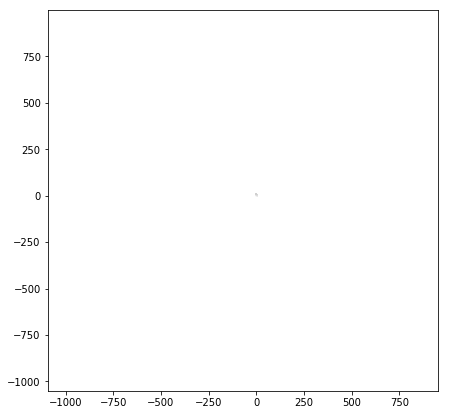

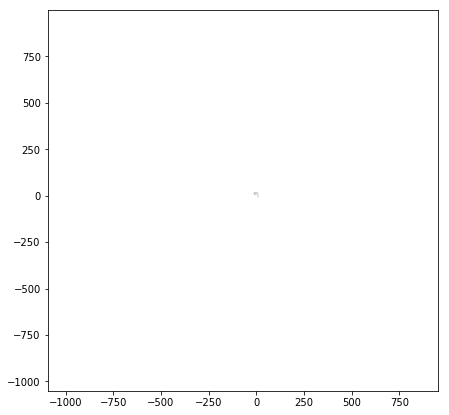

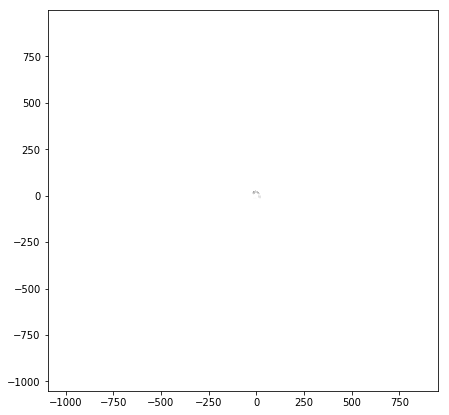

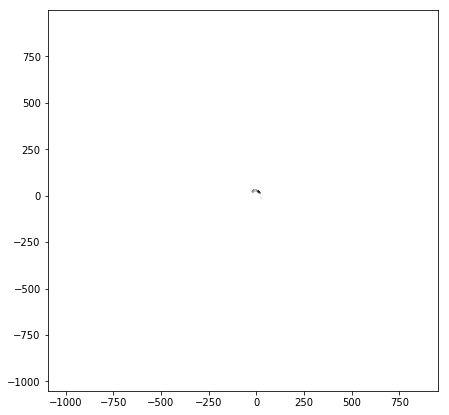

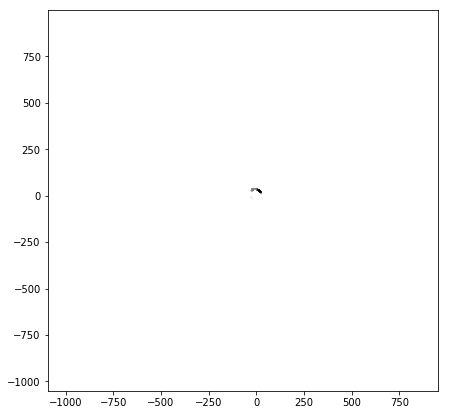

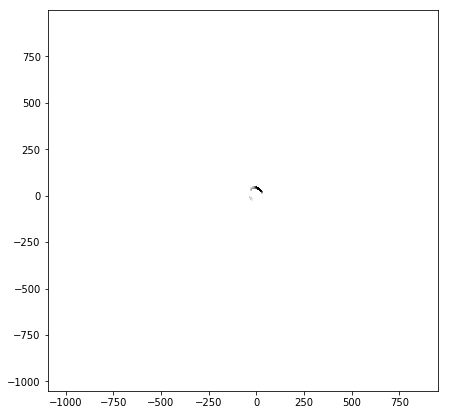

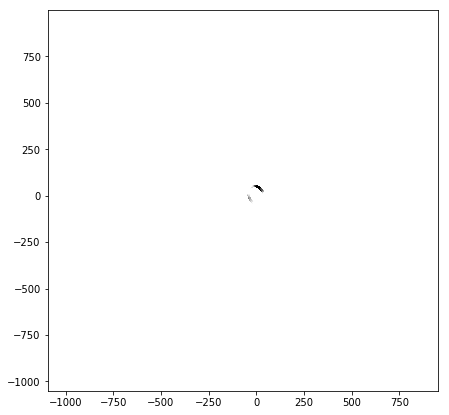

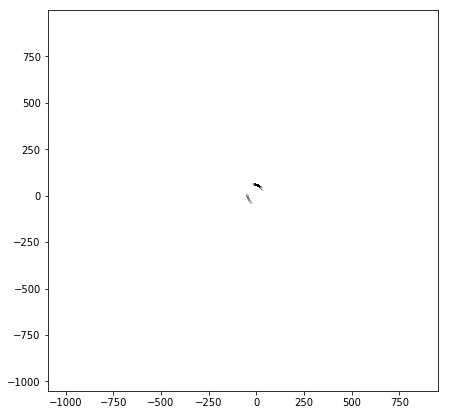

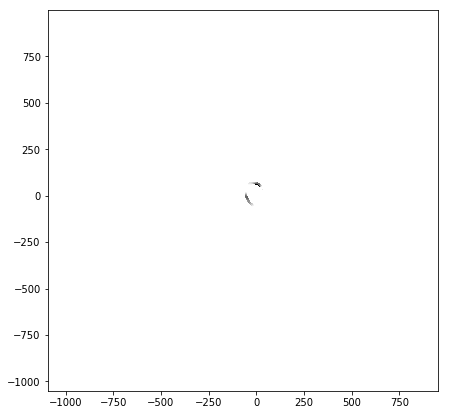

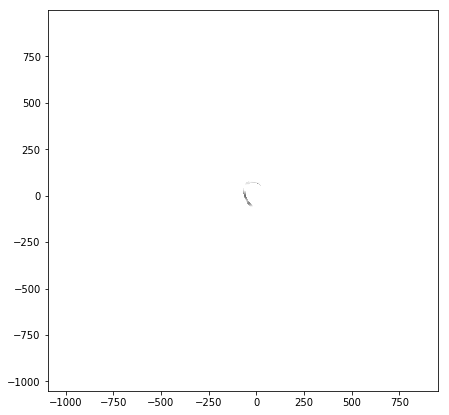

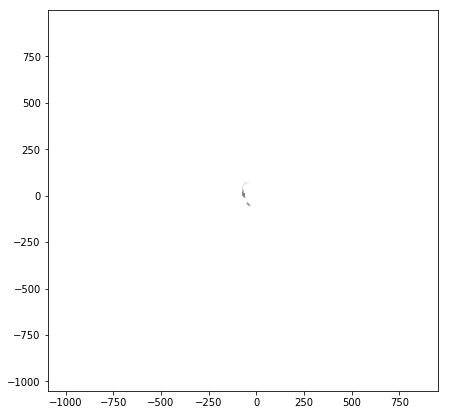

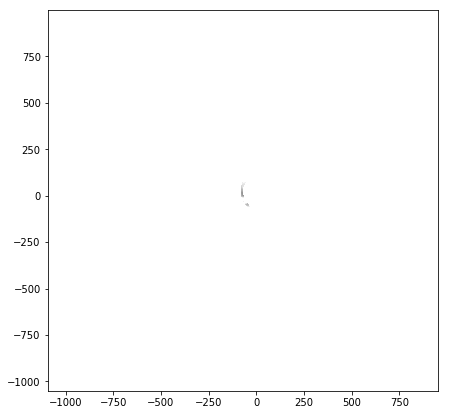

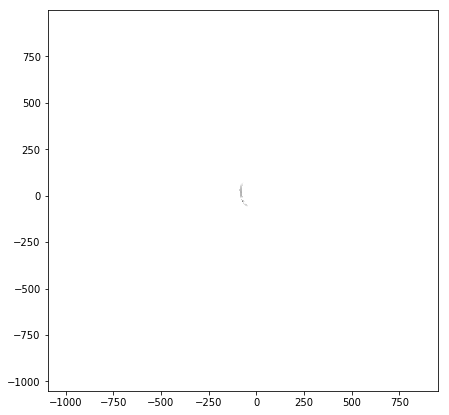

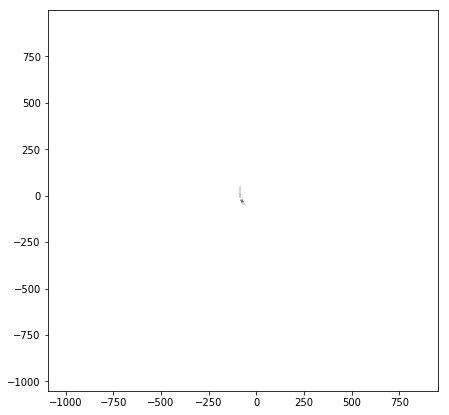

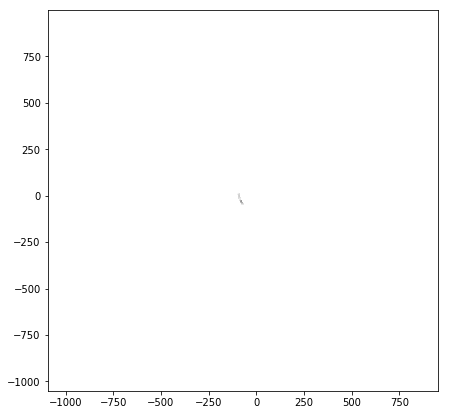

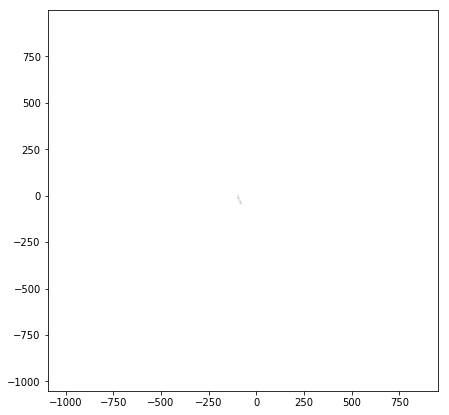

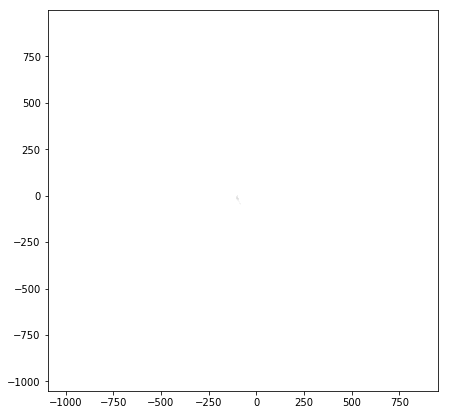

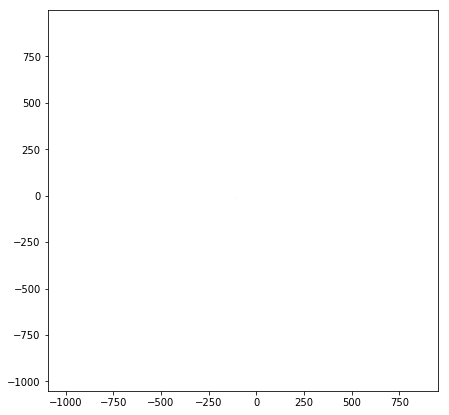

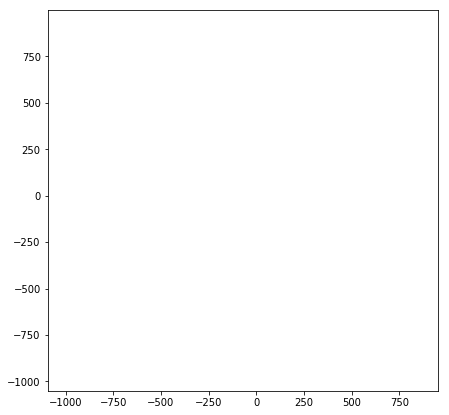

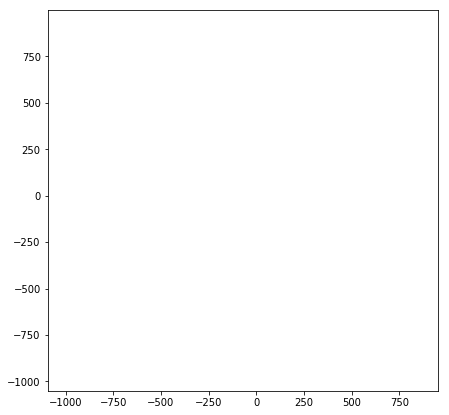

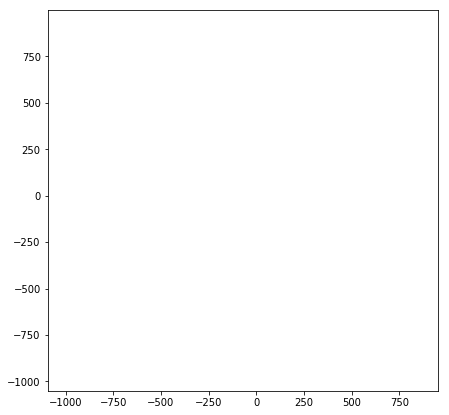

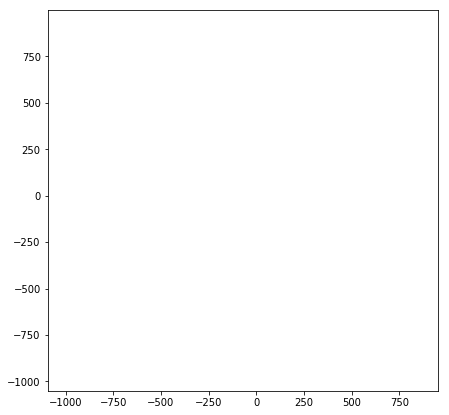

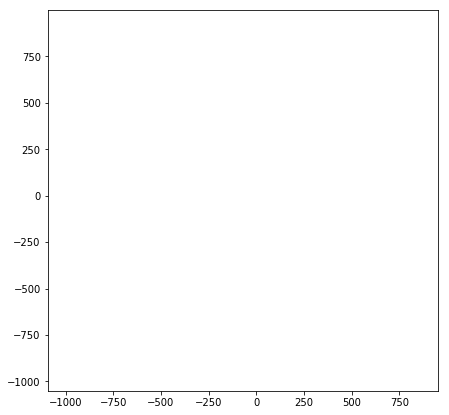

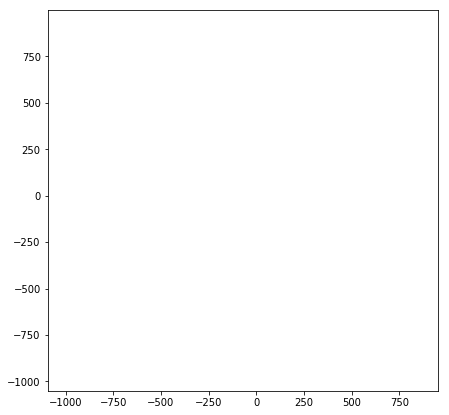

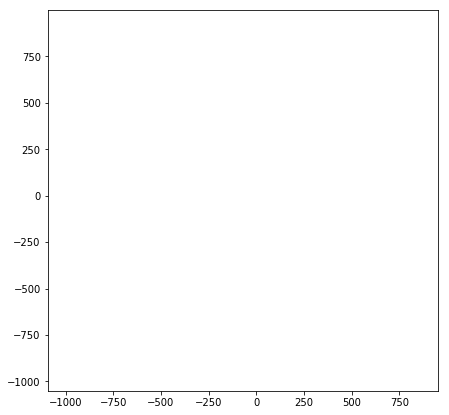

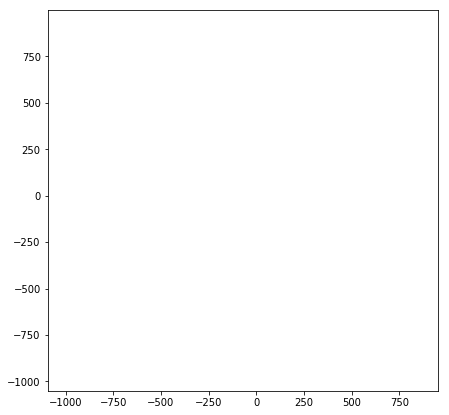

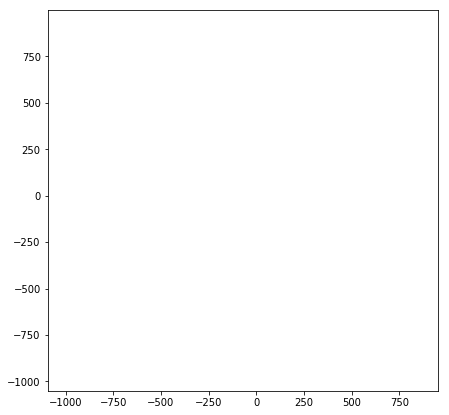

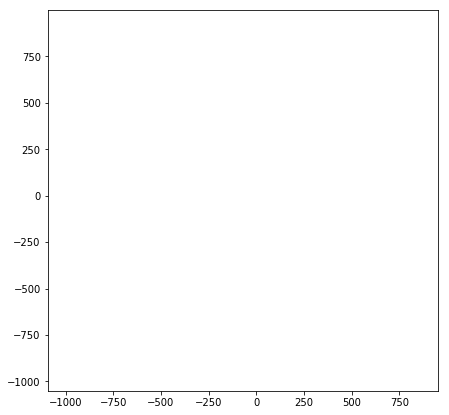

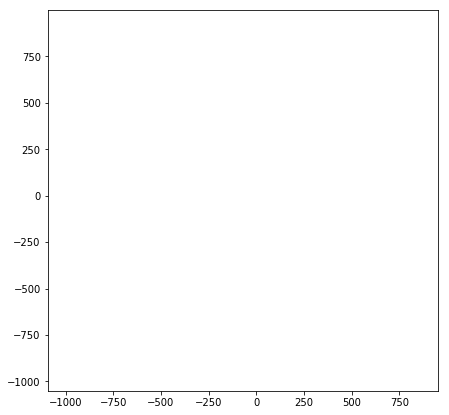

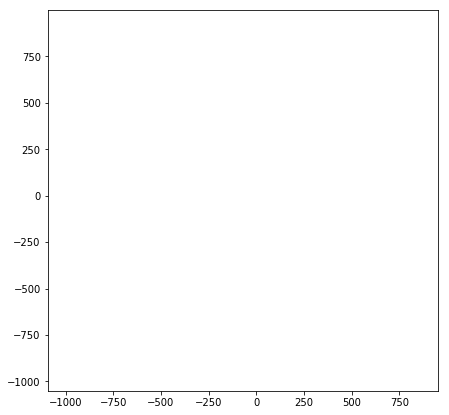

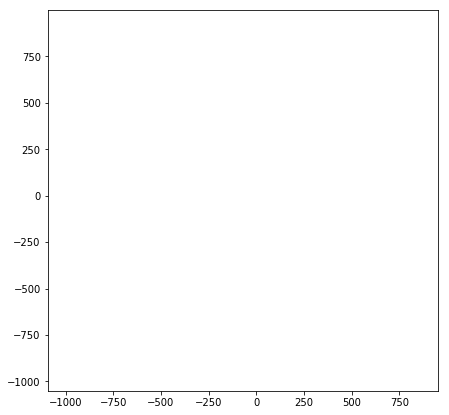

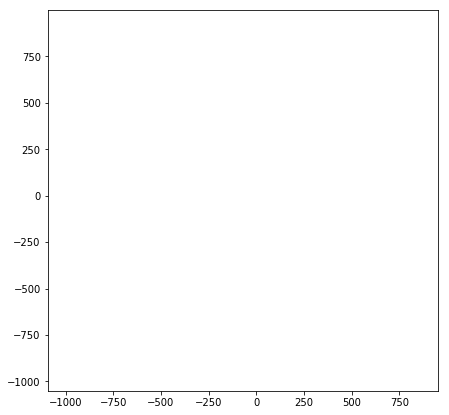

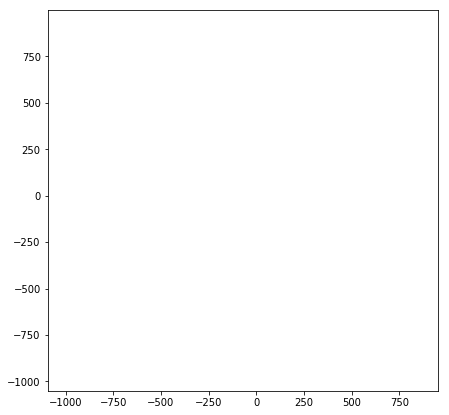

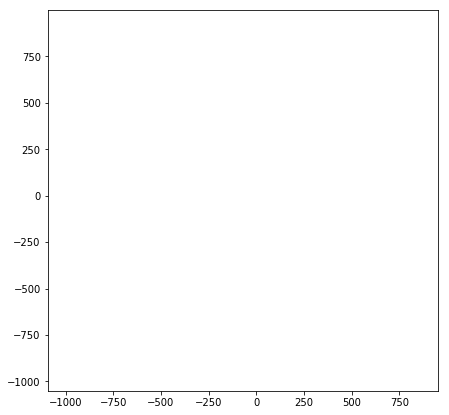

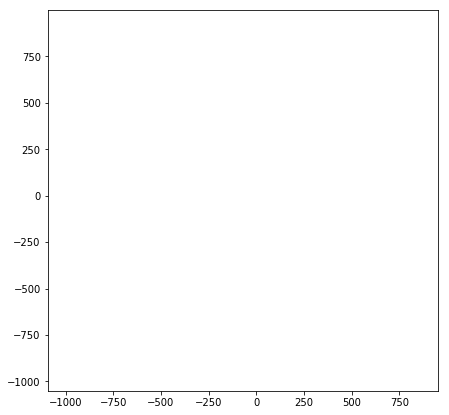

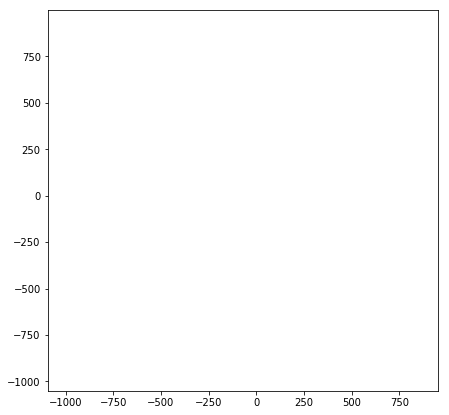

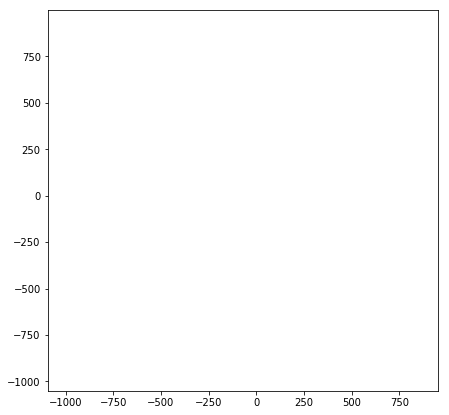

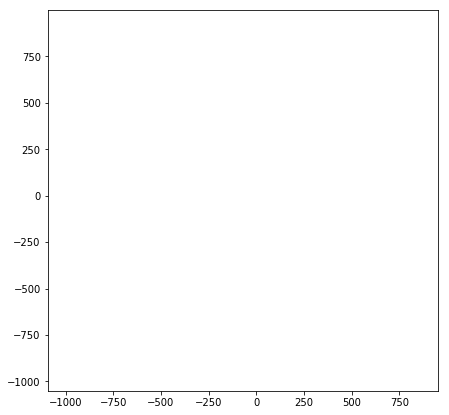

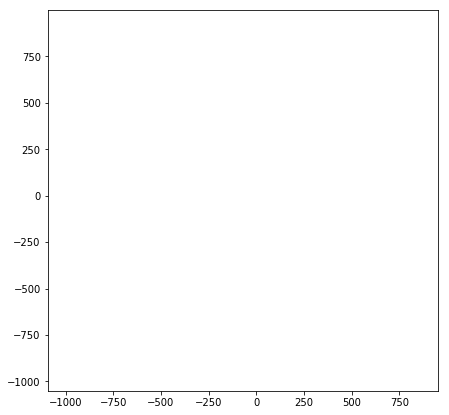

In [3]:
aper_fluxes=np.zeros(len(apertures))
error_aper_fluxes=np.zeros(len(apertures))
diff_aper_fluxes=np.zeros(len(apertures))
error_diff_aper_fluxes=np.zeros(len(apertures))
diff_area=np.zeros(len(apertures))

for i in range(len(apertures)):
    if i == 0:
        mask = r > apertures[0]
        maskinverse=r < apertures[0]
        maskinverse=~mask
        maskedimage=np.ma.MaskedArray(image[0,0,:,:], mask=mask)
        npixels=np.sum(~mask)
    elif i > 0:  
        mask1 = r > apertures[i-1]
        mask2 = r <= apertures[i]
        mask = mask1*mask2
        maskinverse=~mask
        maskedimage=np.ma.MaskedArray(image[0,0,:,:], mask=~mask)
        npixels=np.sum(mask)
    fig=plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    plt.pcolormesh(xgrid_off[:],ygrid_off[:],maskedimage[:,:]/jybm2jy, cmap='gray_r', vmin=-0.0014, vmax=0.01)
    aper_fluxes[i]=np.sum(maskedimage)

    error_aper_fluxes[i]=npixels/pixelsperbeam*rms
    if i == 0:
        diff_aper_fluxes[i]=aper_fluxes[i].copy()
        error_diff_aper_fluxes[i]=error_aper_fluxes[i].copy()
        diff_area[i]=(apertures[i]*pixscale*230.0)**2*3.14159
    elif i > 0:
        diff_aper_fluxes[i]=aper_fluxes[i].copy()
        error_diff_aper_fluxes[i]=error_aper_fluxes[i].copy()
        diff_area[i]=(apertures[i]*pixscale*230.0)**2*3.14159 -(apertures[i-1]*pixscale*230.0)**2*3.14159

    print(apertures[i], aper_fluxes[i],error_aper_fluxes[i], diff_aper_fluxes[i],error_diff_aper_fluxes[i],npixels)

    

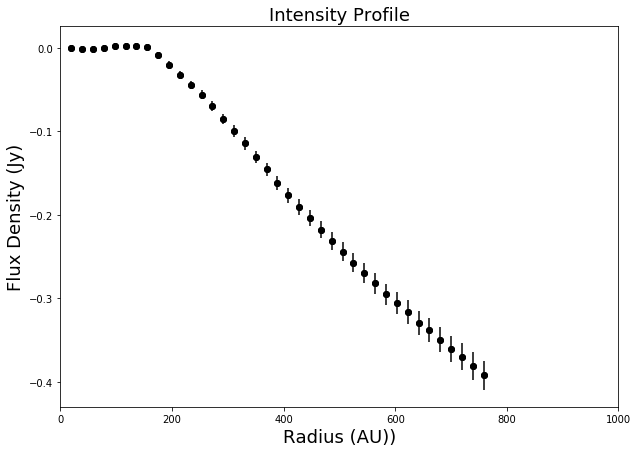

In [4]:
fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_xlim(0,1000.0)
#ax.set_ylim(-0.001,0.01)

radii=apertures*pixscale*230.0
lin1=ax.plot(radii,diff_aper_fluxes,marker='o',color='black',linestyle='none')
lin1err=ax.errorbar(radii,diff_aper_fluxes, yerr=error_diff_aper_fluxes, fmt='o',color='black')

ax.set_title('Intensity Profile', fontsize=18)
ax.set_ylabel('Flux Density (Jy)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)
plt.savefig('L1448N-intensity-rad-ann-' + _end_)

In [5]:
temp=(radii/1.0)**(-0.4)*200.0
print(radii,temp)

def emissive_mass(flux=None,lam=None,lam0=None,beta=None,kappa0=None,distance=None,temp=None):
    #temp=30.0
    kb=1.36e-16
    dgr=100.0
    flux=flux*1.0e-23
    nu=3.0e11/lam
    #print nu/1.0e9, 'GHz'
    #kappa0=3.5
    kappa=kappa0*(lam0/lam)**beta
    #print kappa, ' at ',lam,' mm'
    distance=distance*3.09e18
    mass=distance**2*flux*3e10**2/(2.0*kappa*kb*nu**2*temp)*dgr

    return mass

diff_percent_errors=error_diff_aper_fluxes/diff_aper_fluxes
percent_errors=error_aper_fluxes/aper_fluxes
mass_vs_r=emissive_mass(diff_aper_fluxes,1.3,1.3,1.0,0.899,230.0,temp)
total_mass_vs_r=emissive_mass(aper_fluxes,1.3,1.3,1.0,0.899,230.0,temp)

print(mass_vs_r)

sigma=mass_vs_r/(diff_area*1.496e13**2)
#sigma=mass_vs_r/(((apertures*pixscale*230.0*1.496e13)**2)*3.14159)
sigma2=total_mass_vs_r/(((apertures*pixscale*230.0*1.496e13)**2)*3.14159)
print(sigma,sigma2)

[  19.44699112   38.89398225   58.34097337   77.78796449   97.23495562
  116.68194674  136.12893786  155.57592899  175.02292011  194.46991123
  213.91690236  233.36389348  252.8108846   272.25787573  291.70486685
  311.15185797  330.5988491   350.04584022  369.49283134  388.93982247
  408.38681359  427.83380471  447.28079583  466.72778696  486.17477808
  505.6217692   525.06876033  544.51575145  563.96274257  583.4097337
  602.85672482  622.30371594  641.75070707  661.19769819  680.64468931
  700.09168044  719.53867156  738.98566268  758.43265381] [ 61.02236416  46.24630414  39.32244624  35.04814466  32.05538723
  29.8008416   28.0188182   26.56152675  25.33914901  24.29344074
  23.38470821  22.58481466  21.87316799  21.23429346  20.65629968
  20.12987306  19.64759787  19.20348397  18.79263111  18.41098529
  18.05515875  17.72229482  17.40996487  17.11608886  16.83887317
  16.57676154  16.32839597  16.09258519  15.86827909  15.65454781
  15.45056451  15.25559104  15.06896601  14.890094

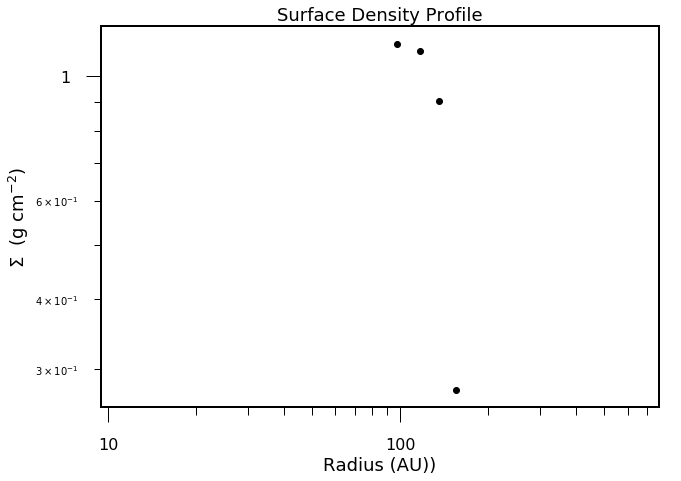

In [6]:
fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
#ax.set_ylim(-0.001,0.01)
radii=apertures*pixscale*230.0
ax.set_xlim(min(radii)-10,max(radii)+10)

lin1=ax.loglog(radii,sigma,marker='o',color='black',linestyle='none')
#lin1err=ax.errorbar(radii,sigma, yerr=sigma*diff_percent_errors, fmt='o',color='black')
#lin1=ax.plot(radii,sigma2,marker='o',color='black',linestyle='none')
#lin1err=ax.errorbar(radii,sigma2, yerr=sigma2*percent_errors, fmt='o',color='black')
ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(ticks_font)

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_title('Surface Density Profile', fontsize=18)
ax.set_ylabel('$\Sigma$  (g cm$^{-2}$)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)
plt.savefig('L1448N-surface-density-lograd-ann-' + _end_)


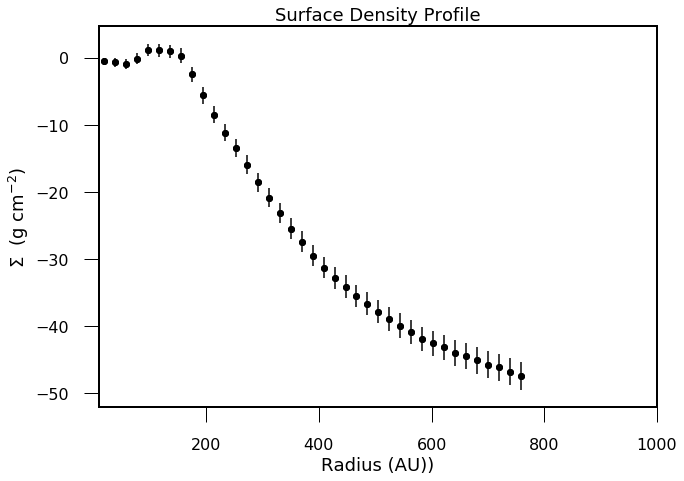

In [7]:
fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_xlim(10,1000.0)
#ax.set_ylim(-0.001,0.01)

#radii=apertures*pixscale*230.0
lin1=ax.plot(radii,sigma,marker='o',color='black',linestyle='none')
lin1err=ax.errorbar(radii,sigma, yerr=sigma*diff_percent_errors, fmt='o',color='black')
#lin1=ax.plot(radii,sigma2,marker='o',color='black',linestyle='none')
#lin1err=ax.errorbar(radii,sigma2, yerr=sigma2*percent_errors, fmt='o',color='black')
ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(ticks_font)

#for axis in [ax.xaxis, ax.yaxis]:
#    axis.set_major_formatter(ScalarFormatter())
#    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_title('Surface Density Profile', fontsize=18)
ax.set_ylabel('$\Sigma$  (g cm$^{-2}$)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)
plt.savefig('L1448N-surface-density-linear-ann-' + _end_)
